In [1]:
import pandas as pd
import plotly.express as px

data_path = "input_data/NY-House-Dataset.csv"
all_data = pd.read_csv(data_path)
all_data.head()
#all_data.describe()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [2]:
filtered_price=all_data.loc[all_data['PRICE'] < 10**9]

fig = px.density_mapbox(all_data, lat = 'LATITUDE', lon = 'LONGITUDE', z = 'PRICE',
                        radius = 15,
                        center = dict(lat = 40.76, lon = -73.98),
                        zoom = 11,
                        mapbox_style = 'carto-darkmatter',
                        color_continuous_scale = 'rainbow')
fig.show()

In [3]:
filtered_price_sqft=all_data.loc[all_data['PROPERTYSQFT'] < 10**4]

fig = px.density_mapbox(all_data, lat = 'LATITUDE', lon = 'LONGITUDE', z = 'PROPERTYSQFT',
                        radius = 10,
                        center = dict(lat = 40.76, lon = -73.98),
                        zoom = 10,
                        mapbox_style = 'carto-darkmatter',
                        color_continuous_scale = 'rainbow')
fig.show()

/var/folders/0r/cm8bfx952t9gzf_w4gt5hc_r0000gn/T/ipykernel_74960/1930327022.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



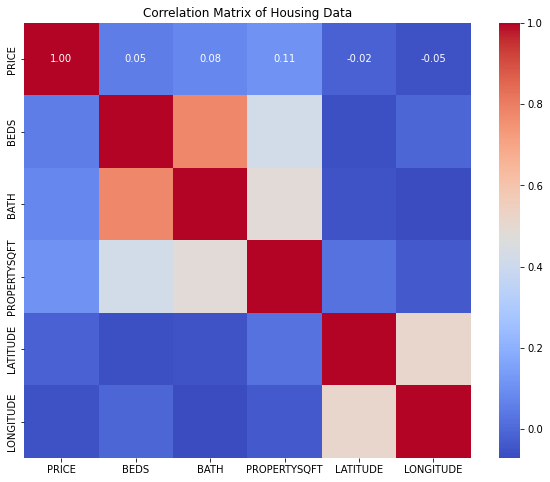

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = all_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Housing Data')
plt.show()


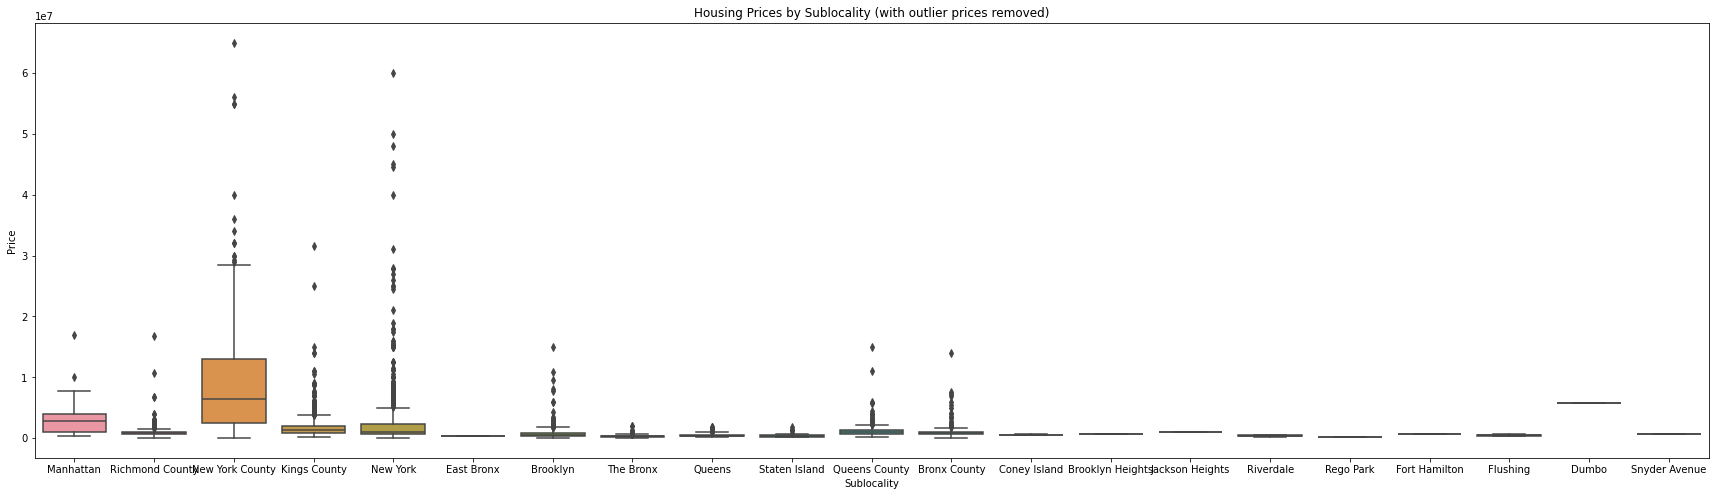

In [5]:
filtered_price_2=all_data.loc[all_data['PRICE'] < 10**8]
plt.figure(figsize=(30, 8))
sns.boxplot(x='SUBLOCALITY', y='PRICE', data=filtered_price_2)
plt.title('Housing Prices by Sublocality (with outlier prices removed)')
plt.xlabel('Sublocality')
plt.ylabel('Price')
plt.show()

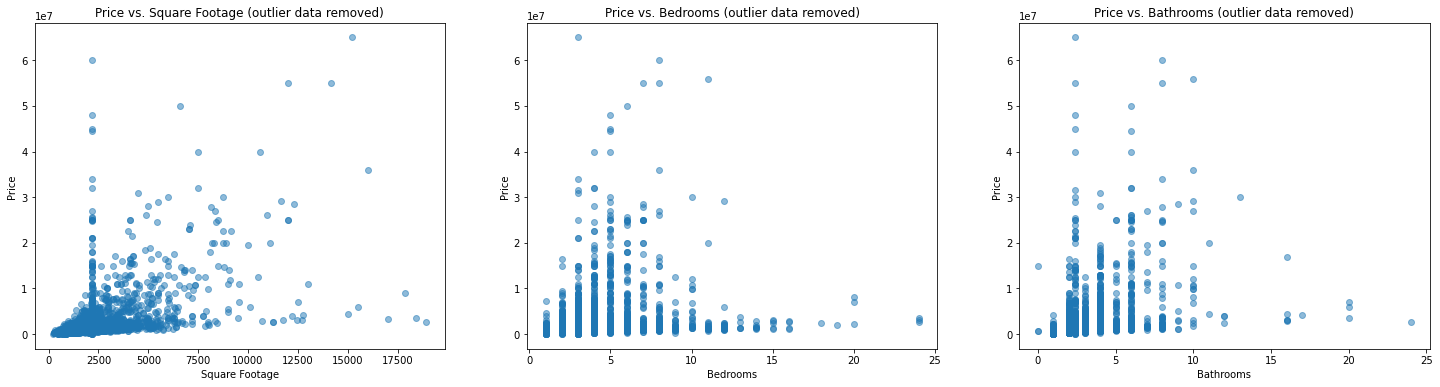

In [35]:
fig = plt.figure(figsize=(25,6))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

filtered_sqft = filtered_price_2.loc[all_data['PROPERTYSQFT'] < 20000]
ax1.scatter(filtered_sqft['PROPERTYSQFT'], filtered_sqft['PRICE'], alpha=0.5)
ax1.set_title('Price vs. Square Footage (outlier data removed)')
ax1.set_xlabel('Square Footage')
ax1.set_ylabel('Price')

filtered_bed = filtered_price_2.loc[all_data['BEDS'] < 30]
ax2.scatter(filtered_bed['BEDS'], filtered_bed['PRICE'], alpha=0.5)
ax2.set_title('Price vs. Bedrooms (outlier data removed)')
ax2.set_xlabel('Bedrooms')
ax2.set_ylabel('Price')

filtered_bath = filtered_price_2.loc[all_data['BATH'] < 30]
ax3.scatter(filtered_bath['BATH'], filtered_bath['PRICE'], alpha=0.5)
ax3.set_title('Price vs. Bathrooms (outlier data removed)')
ax3.set_xlabel('Bathrooms')
ax3.set_ylabel('Price')

plt.show()